In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# visulaisation
from matplotlib.pyplot import xticks
get_ipython().run_line_magic('matplotlib', 'inline')

In [4]:
# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [5]:
#Data Preperations
data = pd.DataFrame(pd.read_csv('Leads.csv'))
data.head(5) 


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
#checking duplicates
sum(data.duplicated(subset = 'Prospect ID')) == 0


True

In [7]:
data.shape


(9240, 37)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [10]:
data = data.replace('Select', np.nan)

In [11]:
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [12]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [13]:
# we will drop the columns having more than 70% NA values.
data = data.drop(data.loc[:,list(round(100*(data.isnull().sum()/len(data.index)), 2)>70)].columns, 1)


In [14]:
# Now we will take care of null values in each column one by one

data['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

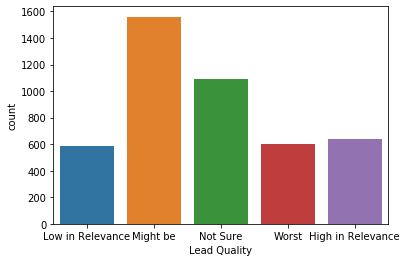

In [15]:
sns.countplot(data['Lead Quality'])

In [16]:
# As Lead quality is based on the intution of employee, so if left blank we can impute 'Not Sure' in NaN safely.
data['Lead Quality'] = data['Lead Quality'].replace(np.nan, 'Not Sure')

In [17]:
data['Lead Quality'].describe()

count         9240
unique           5
top       Not Sure
freq          5859
Name: Lead Quality, dtype: object

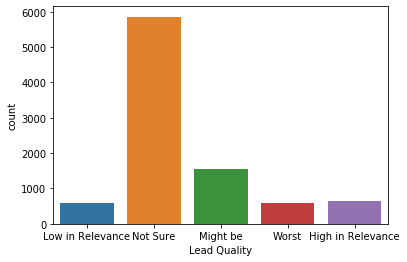

In [18]:
sns.countplot(data['Lead Quality'])

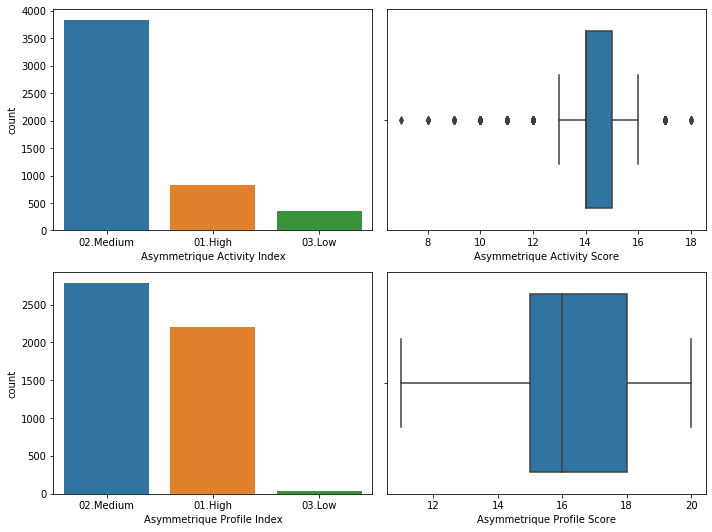

In [19]:
# Asymmetrique Activity Index  |
# Asymmetrique Profile Index   \   An index and score assigned to each customer
# Asymmetrique Activity Score  |    based on their activity and their profile
# Asymmetrique Profile Score   \

fig, axs = plt.subplots(2,2, figsize = (10,7.5))
plt1 = sns.countplot(data['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.boxplot(data['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(data['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.boxplot(data['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()



In [20]:
# There is too much variation in thes parameters so its not reliable to impute any value in it. 
# 45% null values means we need to drop these columns.

data = data.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)


In [21]:
round(100*(data.isnull().sum()/len(data.index)), 2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [22]:
# taking care of city column 

data.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

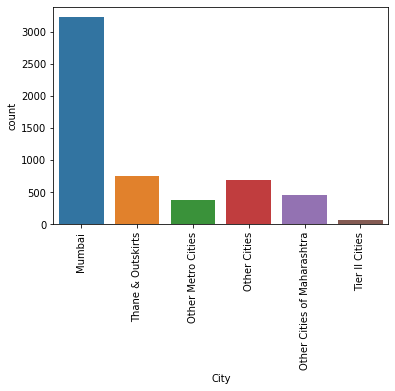

In [23]:
sns.countplot(data.City)
xticks(rotation = 90)

In [24]:
# Around 60% of the data is Mumbai so we can impute Mumbai in the missing values.
data['City'] = data['City'].replace(np.nan, 'Mumbai')


In [25]:
data.City.describe()

count       9240
unique         6
top       Mumbai
freq        6891
Name: City, dtype: object

In [26]:
# Taking care of Specialisation column

data.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text xticklabel objects>)

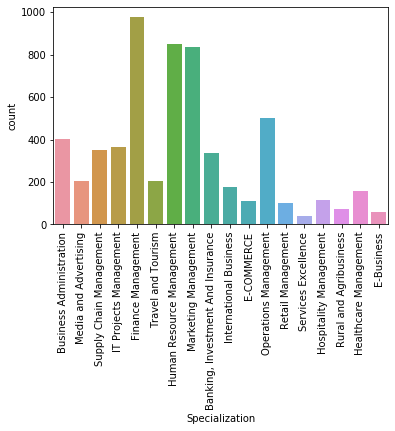

In [27]:
sns.countplot(data.Specialization)
xticks(rotation=90)

In [28]:
# It maybe the case that lead has not entered any specialization if his/her option is not availabe on the list,
#  may not have any specialization or is a student.
# Hence we can make a category "Others" for missing values. 


data['Specialization'] = data['Specialization'].replace(np.nan, 'Others')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

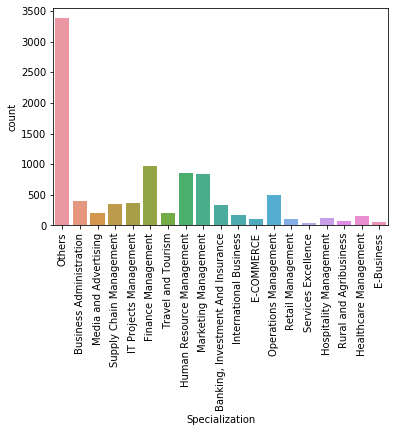

In [29]:
sns.countplot(data.Specialization)
xticks(rotation=90)

In [30]:
round(100*(data.isnull().sum()/len(data.index)), 2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [31]:
data.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

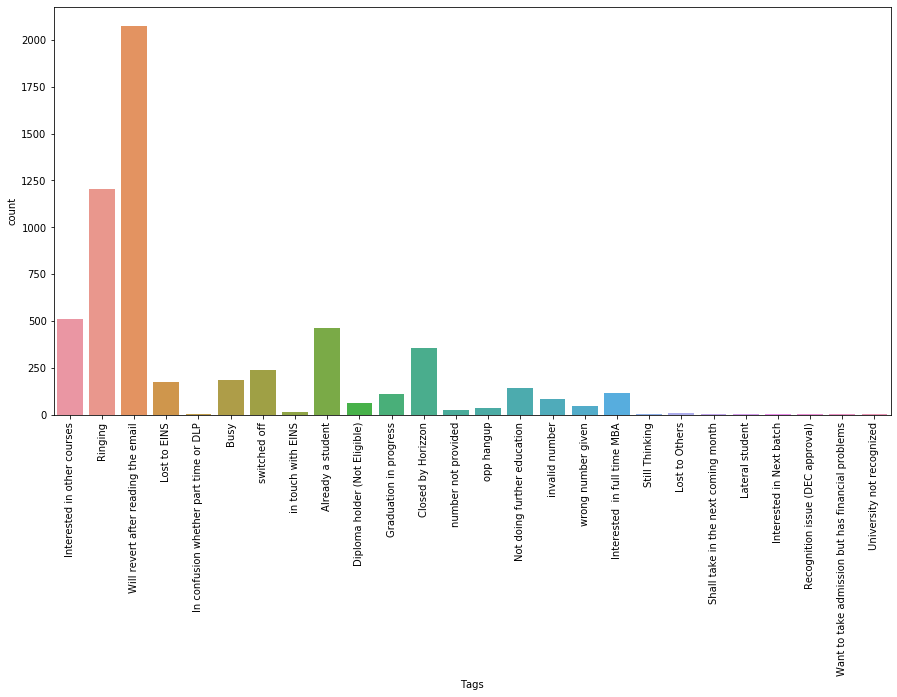

In [32]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(data.Tags)
xticks(rotation=90)

In [33]:
# Blanks in the tag column may be imputed by 'Will revert after reading the email'.

data['Tags'] = data['Tags'].replace(np.nan, 'Will revert after reading the email')


In [34]:
data.Tags.describe()

count                                    9240
unique                                     26
top       Will revert after reading the email
freq                                     5425
Name: Tags, dtype: object

In [35]:
data['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

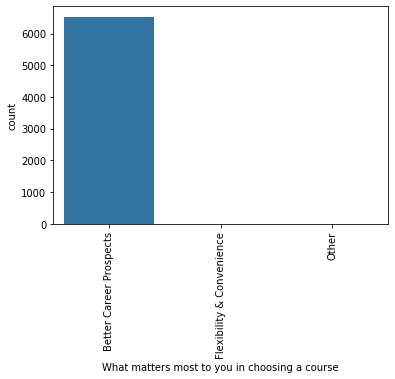

In [36]:
sns.countplot(data['What matters most to you in choosing a course'])
xticks(rotation=90)

In [37]:
# Blanks in the this column may be imputed by 'Better Career Prospects'.

data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [38]:
round(100*(data.isnull().sum()/len(data.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [39]:
#Taking care of What is your current occupation column


data['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

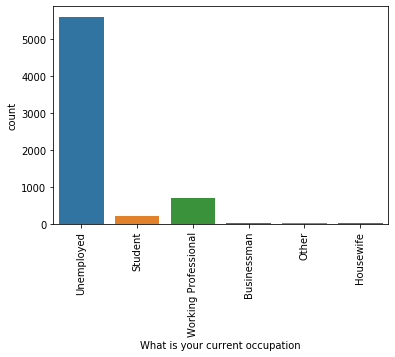

In [40]:
sns.countplot(data['What is your current occupation'])
xticks(rotation=90)

In [41]:
# 86% entries are of Unemployed so we can impute "Unemployed" in it.

data['What is your current occupation']=data['What is your current occupation'].replace(np.nan,'Unemployed')

In [42]:
data['What is your current occupation'].describe()

count           9240
unique             6
top       Unemployed
freq            8290
Name: What is your current occupation, dtype: object

In [43]:
#taking care of Country column

data.Country.describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 <a list of 38 Text xticklabel objects>)

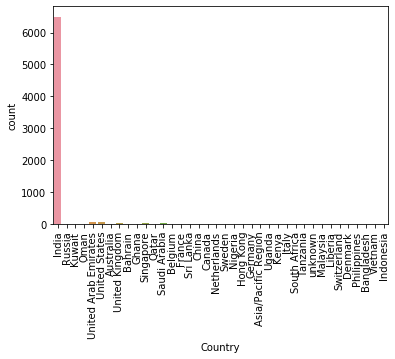

In [44]:
sns.countplot(data.Country)
xticks(rotation=90)

In [45]:
# Country is India for most values so let's impute the same in missing values.
data['Country'] = data['Country'].replace(np.nan, 'India')

In [46]:
data.Country.describe()

count      9240
unique       38
top       India
freq       8953
Name: Country, dtype: object

In [47]:
round(100*(data.isnull().sum()/len(data.index)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [48]:

# Rest missing values are under 2% so we can drop these rows.
data.dropna(inplace = True)

In [49]:
round(100*(data.isnull().sum()/len(data.index)), 2)



Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [50]:
data.to_csv('Leads_cleaned')

In [51]:
# #### Now Data is clean and we can start with the analysis part

# # Exploratory Data Analytics

# ## Univariate Analysis

# ### Converted

# Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).

Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted



37.85541106458012

In [52]:
data.Converted.describe()

count    9074.000000
mean        0.378554
std         0.485053
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Converted, dtype: float64

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

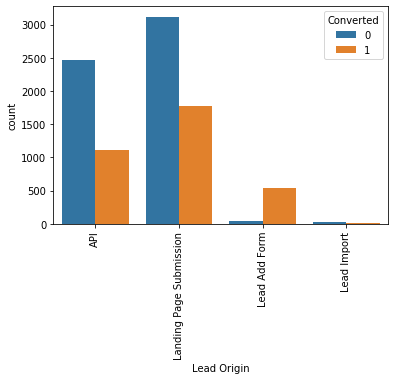

In [53]:
# ### Lead Origin

sns.countplot(x = "Lead Origin", hue = "Converted", data = data)
xticks(rotation = 90)


In [54]:
# #### Inference
# 1. API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
# 2. Lead Add Form has more than 90% conversion rate but count of lead are not very high.
# 3. Lead Import are very less in count.<br>
# 
# 
# __To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.__

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

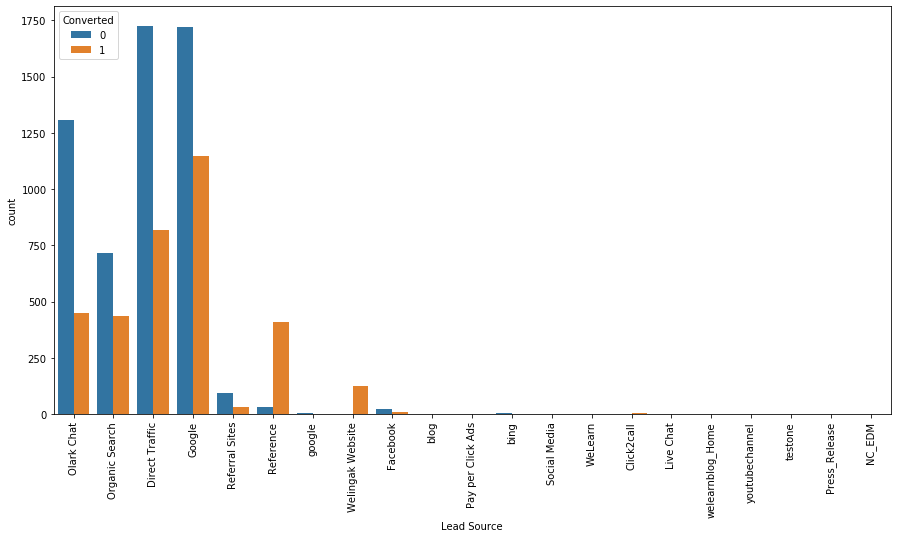

In [55]:
# ### Lead Source

fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = data)
xticks(rotation = 90)



In [56]:

data['Lead Source'] = data['Lead Source'].replace(['google'], 'Google')
data['Lead Source'] = data['Lead Source'].replace(['blog','Social Media','WeLearn','Click2call','Live Chat','Welearning_Home','youtubechannel','testone','Press_Release','NC_EDM'], 'Others')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

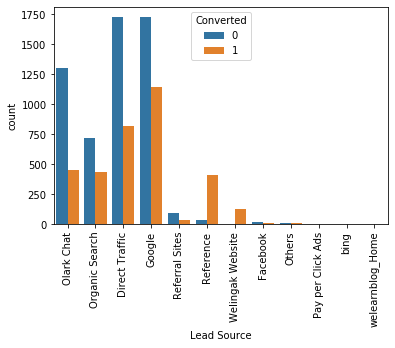

In [57]:
sns.countplot(x = "Lead Source", hue = "Converted", data = data)
xticks(rotation = 90)



In [58]:
# #### Inference
# 1. Google and Direct traffic generates maximum number of leads.
# 2. Conversion Rate of reference leads and leads through welingak website is high.
# 
# __To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google  leads and generate more leads from reference and welingak website.__


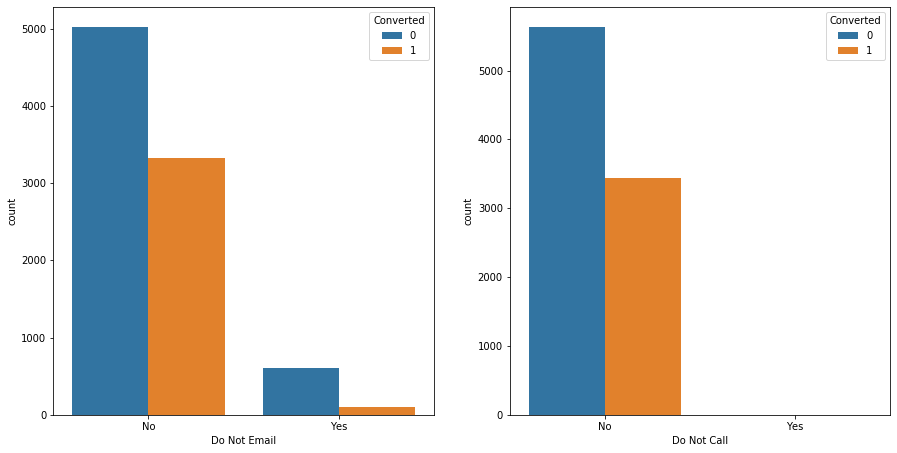

In [59]:
# ### Do Not Email & Do Not Call

fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = data, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = data, ax = axs[1])



In [60]:
# ### Total Visits

data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [61]:
data.head(15)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Not Sure,No,No,Mumbai,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,Email Opened,India,Supply Chain Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Mumbai,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Not Sure,No,No,Mumbai,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.00,Email Opened,India,IT Projects Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Not Sure,No,No,Thane & Outskirts,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.00,Email Opened,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Not Sure,No,No,Mumbai,No,No,Email Opened


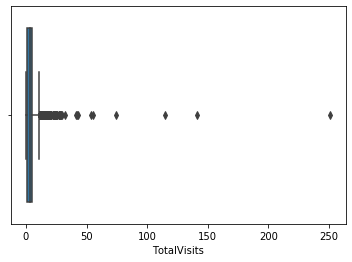

In [62]:
sns.boxplot(data['TotalVisits'])

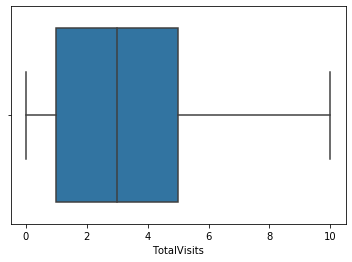

In [63]:
# As we can see there are a number of outliers in the data.
# We will cap the outliers to 95% value for analysis.

percentiles = data['TotalVisits'].quantile([0.05,0.95]).values
data['TotalVisits'][data['TotalVisits'] <= percentiles[0]] = percentiles[0]
data['TotalVisits'][data['TotalVisits'] >= percentiles[1]] = percentiles[1]

sns.boxplot(data['TotalVisits'])

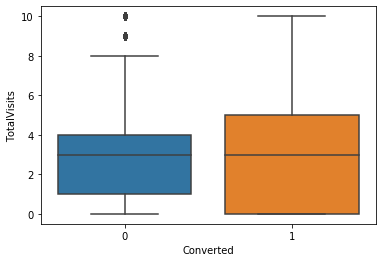

In [64]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data)



In [65]:

# #### Inference
# 1. Median for converted and not converted leads are the same.
# 
# __Nothng conclusive can be said on the basis of Total Visits.__

In [66]:
# ### Total time spent on website

data['Total Time Spent on Website'].describe()



count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

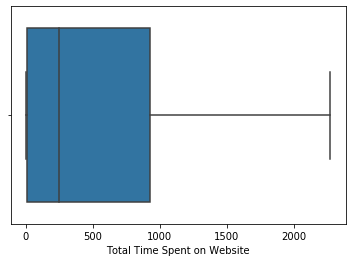

In [67]:
sns.boxplot(data['Total Time Spent on Website'])


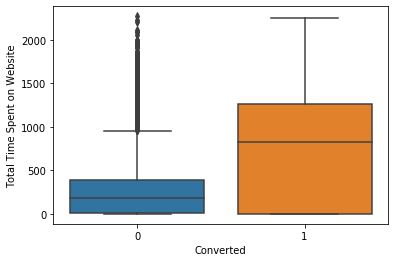

In [68]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = data)


In [69]:
# #### Inference
# 1. Leads spending more time on the weblise are more likely to be converted.
# 
# __Website should be made more engaging to make leads spend more time.__


In [70]:
# ### Page views per visit

data['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

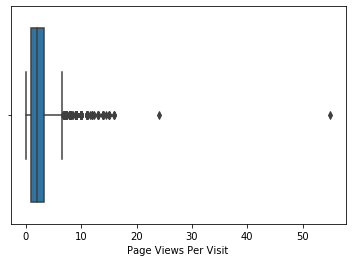

In [71]:
sns.boxplot(data['Page Views Per Visit'])


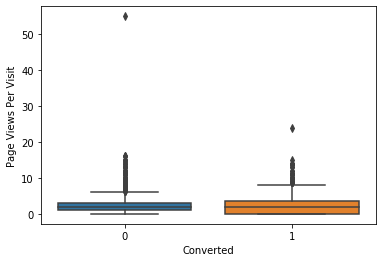

In [72]:
sns.boxplot(y='Page Views Per Visit' , x='Converted',data=data)

In [73]:
# As we can see there are a number of outliers in the data.
# We will cap the outliers to 95% value for analysis.


# In[71]:


percentiles = data['Page Views Per Visit'].quantile([0.05,0.95]).values
data['Page Views Per Visit'][data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
data['Page Views Per Visit'][data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]


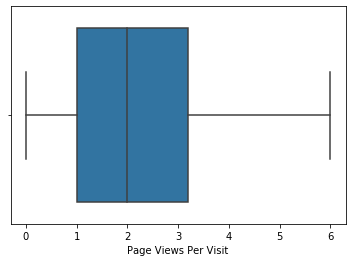

In [74]:
sns.boxplot(data['Page Views Per Visit'])


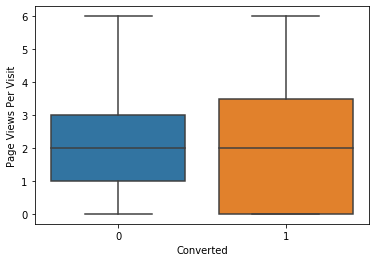

In [75]:
sns.boxplot(y='Page Views Per Visit',x='Converted',data=data)

In [76]:
# #### Inference
# 1. Median for converted and unconverted leads is the same.
# 
# __Nothing can be said specifically for lead conversion from Page Views Per Visit __


In [77]:
# ### Last Activity

data['Last Activity'].describe()



count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

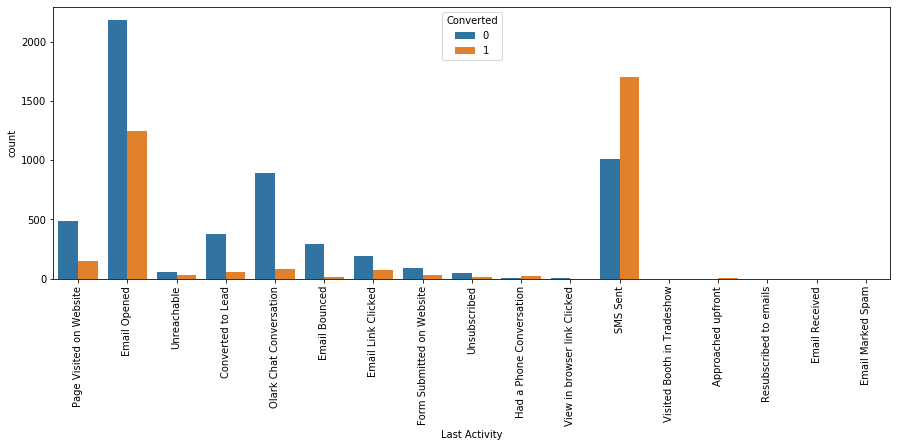

In [78]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = data)
xticks(rotation = 90)

In [79]:
data['Last Activity'] = data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

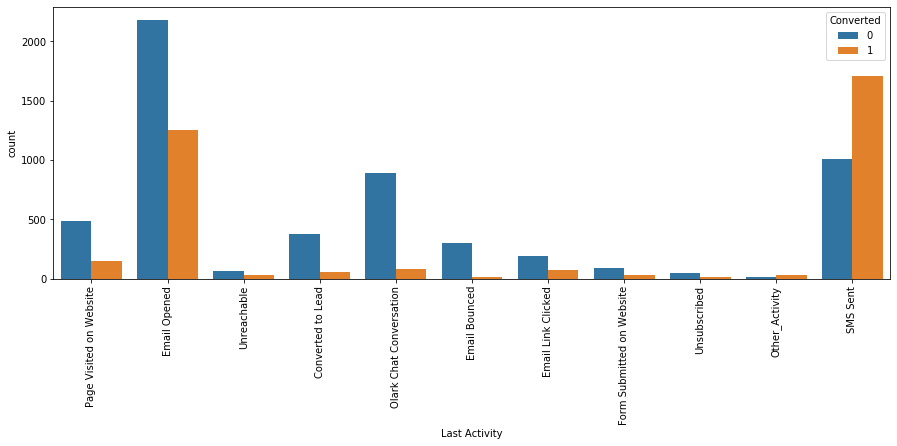

In [80]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = data)
xticks(rotation = 90)

In [81]:
# #### Inference
# 1. Most of the lead have their Email opened as their last activity.
# 2. Conversion rate for leads with last activity as SMS Sent is almost 60%.b


In [82]:
# ### Country

data.Country.describe()

# ### Inference
# Most values are 'India' no such inference can be drawn


count      9074
unique       38
top       India
freq       8787
Name: Country, dtype: object

In [83]:
# ### Specialization

data.Specialization.describe()


count       9074
unique        19
top       Others
freq        3282
Name: Specialization, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

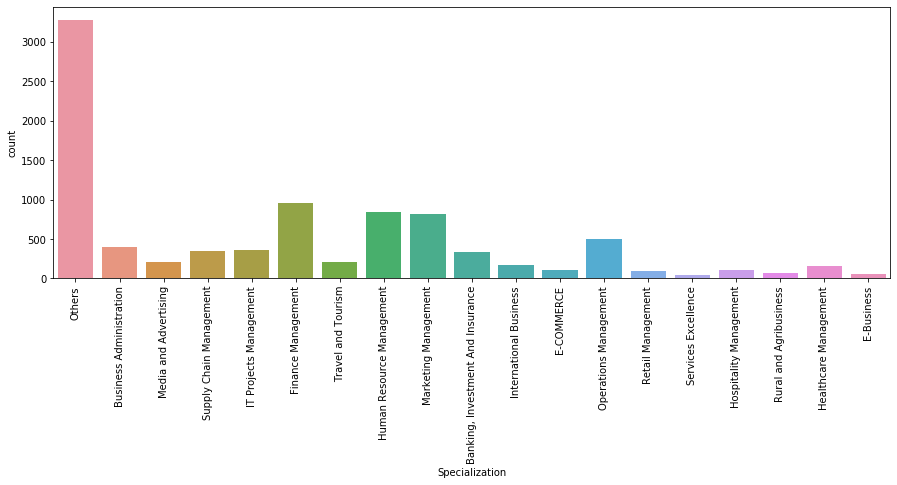

In [84]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(data.Specialization)
xticks(rotation=90)

In [85]:
data['Specialization'] = data['Specialization'].replace(['Others'], 'Other_Specialization')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

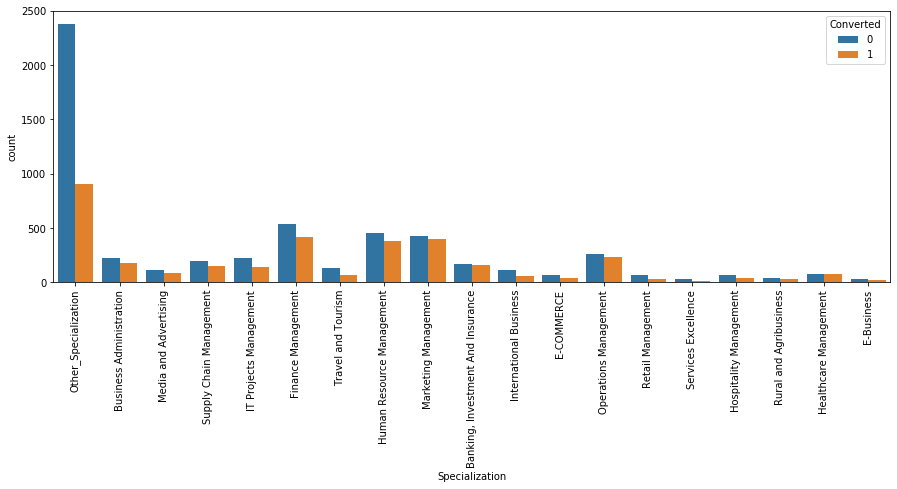

In [86]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x='Specialization',hue='Converted',data=data)
xticks(rotation=90)

In [87]:
# #### Inference
# 1. Focus should be more on the Specialization with high conversion rate.


In [88]:
# ### Occupation

data['What is your current occupation'].describe()



count           9074
unique             6
top       Unemployed
freq            8159
Name: What is your current occupation, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

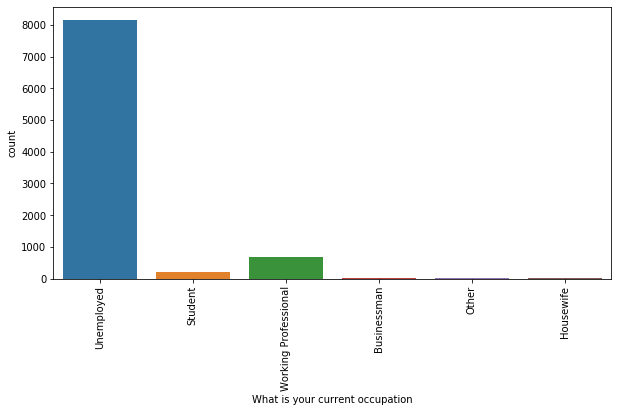

In [89]:

fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(data['What is your current occupation'])
xticks(rotation = 90)

In [90]:
data['What is your current occupation'] = data['What is your current occupation'].replace(['Other'], 'Other_Occupation')


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

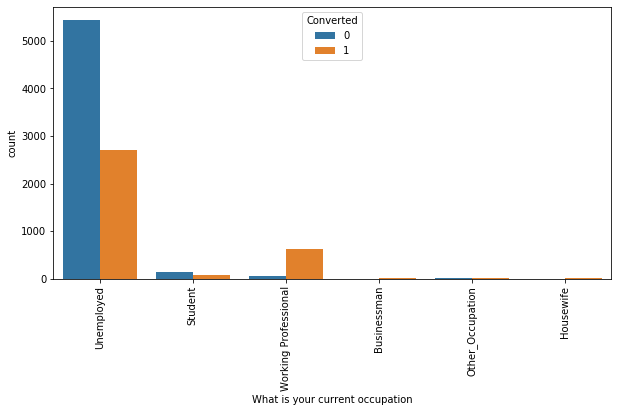

In [91]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = data)
xticks(rotation = 90)

In [92]:
#  ### Inference
# 1. Working Professionals going for the course have high chances of joining it.
# 2. Unemployed leads are the most in numbers but has around 30-35% conversion rate.


In [93]:
# ### What matters most to you in choosing a course

data['What matters most to you in choosing a course'].describe()


# ### Inference
# Most entries are 'Better Career Prospects'.
# No Inference can be drawn with this parameter.


count                        9074
unique                          3
top       Better Career Prospects
freq                         9072
Name: What matters most to you in choosing a course, dtype: object

In [94]:
# ### Search

data.Search.describe()


# ### Inference
# Most entries are 'No'.
# No Inference can be drawn with this parameter.


count     9074
unique       2
top         No
freq      9060
Name: Search, dtype: object

In [95]:
# ### Magazine

data.Magazine.describe()


# ### Inference
# Most entries are 'No'.
# No Inference can be drawn with this parameter.


count     9074
unique       1
top         No
freq      9074
Name: Magazine, dtype: object

In [96]:
# ### Newspaper Article


data['Newspaper Article'].describe()


# ### Inference
# Most entries are 'No'.
# No Inference can be drawn with this parameter.


count     9074
unique       2
top         No
freq      9072
Name: Newspaper Article, dtype: object

In [97]:
# ### X Education Forums

data['X Education Forums'].describe()


# ### Inference
# Most entries are 'No'.
# No Inference can be drawn with this parameter.


count     9074
unique       2
top         No
freq      9073
Name: X Education Forums, dtype: object

In [98]:
# ### Newspaper

data['Newspaper'].describe()


# ### Inference
# Most entries are 'No'.
# No Inference can be drawn with this parameter.


count     9074
unique       2
top         No
freq      9073
Name: Newspaper, dtype: object

In [99]:
# ### Digital Advertisement
data['Digital Advertisement'].describe()


# ### Inference
# Most entries are 'No'.
# No Inference can be drawn with this parameter.


count     9074
unique       2
top         No
freq      9070
Name: Digital Advertisement, dtype: object

In [100]:
# ### Through Recommendations


data['Through Recommendations'].describe()


# ### Inference
# Most entries are 'No'.
# No Inference can be drawn with this parameter.


count     9074
unique       2
top         No
freq      9067
Name: Through Recommendations, dtype: object

In [101]:
# ### Receive More Updates About Our Courses

data['Receive More Updates About Our Courses'].describe()


# ### Inference
# Most entries are 'No'.
# No Inference can be drawn with this parameter.


count     9074
unique       1
top         No
freq      9074
Name: Receive More Updates About Our Courses, dtype: object

In [102]:
# #### Tags

data.Tags.describe()


count                                    9074
unique                                     26
top       Will revert after reading the email
freq                                     5343
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

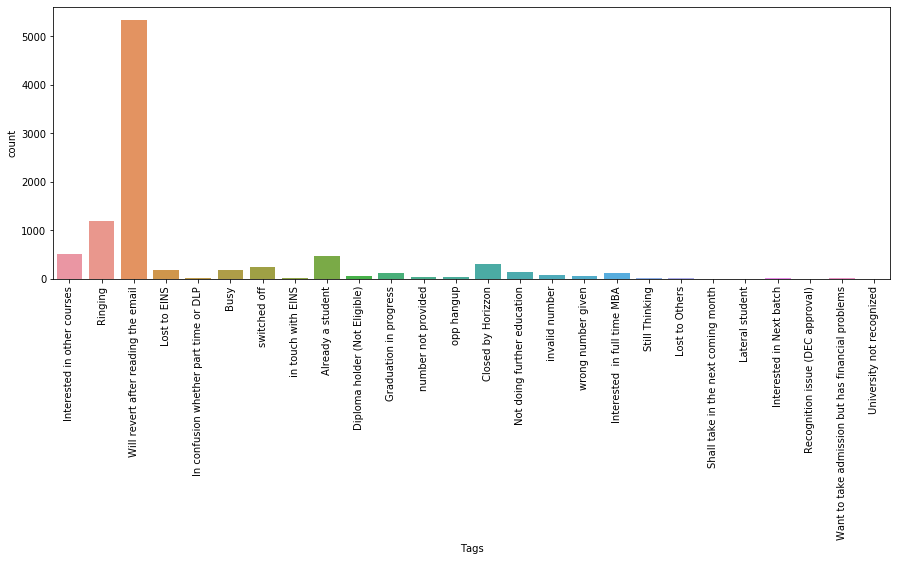

In [103]:
fig,axs=plt.subplots(figsize=(15,5))
sns.countplot(data.Tags)
xticks(rotation=90)

In [104]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
data['Tags'] = data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

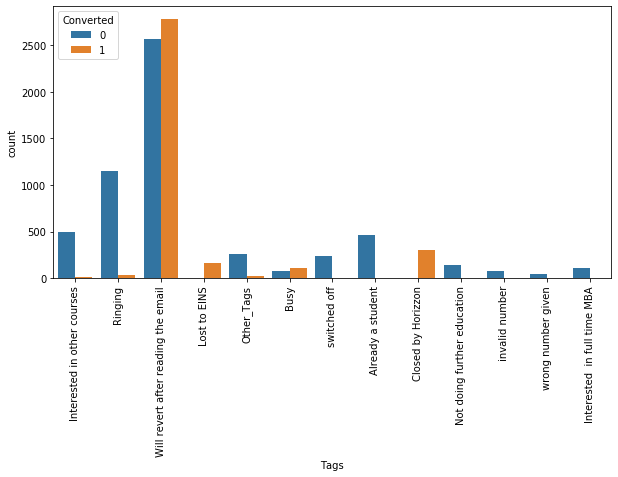

In [105]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Tags", hue = "Converted", data = data)
xticks(rotation = 90)


In [106]:
# ### Lead Quality

# In[98]:


data['Lead Quality'].describe()



count         9074
unique           5
top       Not Sure
freq          5806
Name: Lead Quality, dtype: object

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

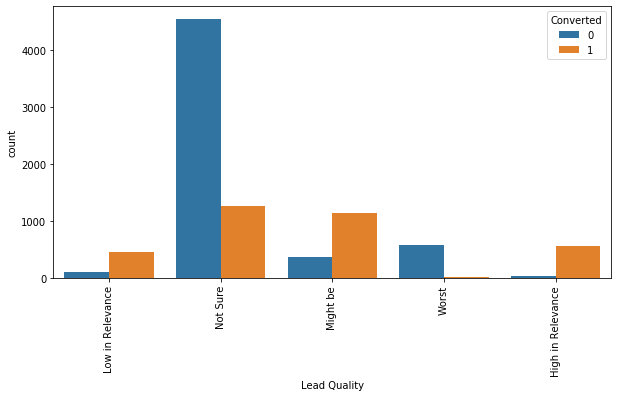

In [107]:

fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Lead Quality", hue = "Converted", data = data)
xticks(rotation = 90)


In [108]:
# ### Update me on Supply Chain Content

data['Update me on Supply Chain Content'].describe()


# ### Inference
# Most entries are 'No'.
# No Inference can be drawn with this parameter.


count     9074
unique       1
top         No
freq      9074
Name: Update me on Supply Chain Content, dtype: object

In [109]:
# ### Get updates on DM Content


data['Get updates on DM Content'].describe()


# ### Inference
# Most entries are 'No'.
# No Inference can be drawn with this parameter.


count     9074
unique       1
top         No
freq      9074
Name: Get updates on DM Content, dtype: object

In [110]:
# ### I agree to pay the amount through cheque

data['I agree to pay the amount through cheque'].describe()


# ### Inference
# Most entries are 'No'.
# No Inference can be drawn with this parameter.


count     9074
unique       1
top         No
freq      9074
Name: I agree to pay the amount through cheque, dtype: object

In [111]:
# ### A free copy of Mastering The Interview

data['A free copy of Mastering The Interview'].describe()


# ### Inference
# Most entries are 'No'.
# No Inference can be drawn with this parameter.



count     9074
unique       2
top         No
freq      6186
Name: A free copy of Mastering The Interview, dtype: object

In [112]:
# ### City

data.City.describe()



count       9074
unique         6
top       Mumbai
freq        6752
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

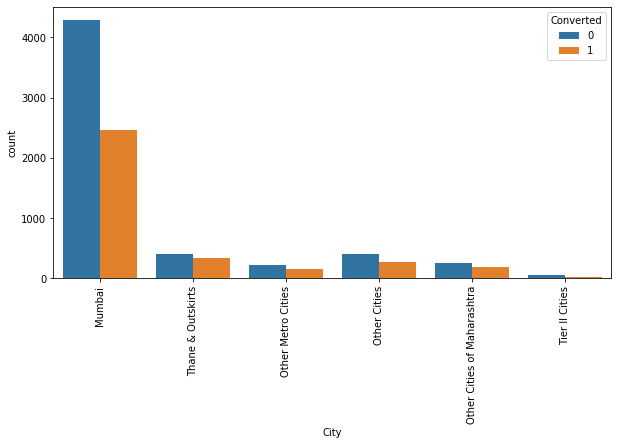

In [113]:

fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "City", hue = "Converted", data = data)
xticks(rotation = 90)



In [114]:
# ### Inference
# Most leads are from mumbai with around 30% conversion rate.


In [115]:
# ### Last Notable Activity

data['Last Notable Activity'].describe()



count         9074
unique          16
top       Modified
freq          3267
Name: Last Notable Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

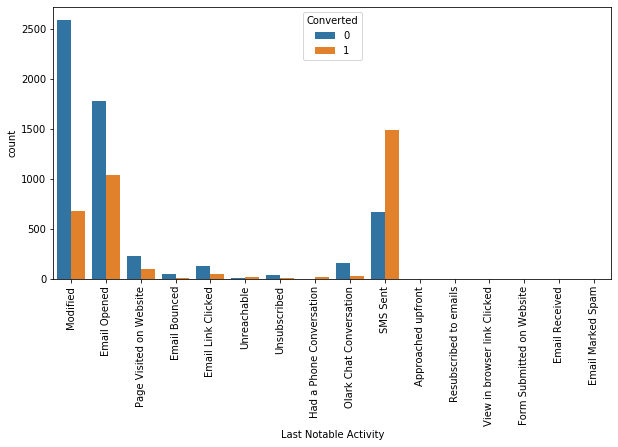

In [116]:

fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = data)
xticks(rotation = 90)



In [117]:
# ## Results
# 
# __Based on the univariate analysis we have seen that many columns are not adding any information to the model, heance we can drop them for frther analysis__

In [118]:
data = data.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)



In [119]:
data.shape

(9074, 16)

In [120]:
data.head(5)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [121]:
# ### Data Preparation

# #### Converting some binary variables (Yes/No) to 1/0
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)


In [122]:
# #### For categorical variables with multiple levels, create dummy features (one-hot encoded)

# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy1.head(5)



,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Pay per Click Ads,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_bing,Lead Source_welearnblog_Home,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [125]:
dummy1.shape

(9074, 83)

In [127]:
# Adding the results to the master dataframe
data = pd.concat([data, dummy1], axis=1)
data.head(5)


,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Pay per Click Ads,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_bing,Lead Source_welearnblog_Home,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,...,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-197

In [128]:
data.shape

(9074, 182)

In [129]:

data = data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis = 1)


In [130]:
data.head(5)

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Pay per Click Ads,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_bing,Lead Source_welearnblog_Home,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,...,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0

In [132]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = data.drop(['Prospect ID','Converted'], axis=1)
y=data['Converted']

In [134]:
X.head(5)


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Pay per Click Ads,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_bing,Lead Source_welearnblog_Home,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,...,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,

In [135]:
y.head(5)

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [136]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=100)



In [137]:
# ### Step 5: Feature Scaling

# In[120]:


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [139]:
X_train.head(5)

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Pay per Click Ads,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_bing,Lead Source_welearnblog_Home,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,...,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,..

In [140]:
# Checking the Churn Rate
Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted



37.85541106458012

In [141]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)



In [142]:

rfe.support_



array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False,  True, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [143]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 6),
 ('Do Not Call', False, 64),
 ('TotalVisits', False, 85),
 ('Total Time Spent on Website', False, 14),
 ('Page Views Per Visit', False, 78),
 ('Lead Origin_Landing Page Submission', False, 28),
 ('Lead Origin_Lead Add Form', False, 12),
 ('Lead Origin_Lead Import', False, 13),
 ('Lead Source_Facebook', False, 49),
 ('Lead Source_Google', False, 110),
 ('Lead Source_Olark Chat', False, 16),
 ('Lead Source_Organic Search', False, 80),
 ('Lead Source_Others', False, 106),
 ('Lead Source_Pay per Click Ads', False, 156),
 ('Lead Source_Reference', False, 107),
 ('Lead Source_Referral Sites', False, 134),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 70),
 ('Lead Source_welearnblog_Home', False, 93),
 ('Last Activity_Email Bounced', False, 56),
 ('Last Activity_Email Link Clicked', False, 54),
 ('Last Activity_Email Opened', False, 148),
 ('Last Activity_Form Submitted on Website', False, 138),
 ('Last Activity_Olark Chat Conversation',

In [144]:
col = X_train.columns[rfe.support_]
col


Index(['Lead Source_Welingak Website', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Last Notable Activity_SMS Sent',
       'Lead Source_Welingak Website', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Lead Quality_Not Sure',
       'Lead Quality_Worst'],
      dtype='object')

In [145]:
X_train.columns[~rfe.support_]


Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       ...
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=156)

In [146]:
X_train_sm = X_train[col]
X_train_sm


,Lead Source_Welingak Website,Lead Source_Welingak Website,Tags_Busy,Tags_Busy,Tags_Closed by Horizzon,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Lost to EINS,Tags_Will revert after reading the email,Tags_Will revert after reading the email,Tags_switched off,Tags_switched off,Last Notable Activity_SMS Sent,Last Notable Activity_SMS Sent,Lead Source_Welingak Website,Lead Source_Welingak Website,Tags_Busy,Tags_Busy,Tags_Closed by Horizzon,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Lost to EINS,Tags_Ringing,Tags_Ringing,Tags_Will revert after reading the email,Tags_Will revert after reading the email,Lead Quality_Not Sure,Lead Quality_Not Sure,Lead Quality_Worst,Lead Quality_Worst
3009,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0
1012,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0
9226,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0
4750,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0
7987,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0
82,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
8199,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0
7077,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [147]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2', max_iter=200, solver='lbfgs',random_state = 0 )
classifier.fit(X_train_sm,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [148]:
y_train_pred=classifier.predict(X_train_sm)


In [149]:
# ##### Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0,3009
1,0,0,1012
2,0,0,9226
3,1,1,4750
4,1,1,7987


In [150]:
# ##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)


In [151]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0,3009,0
1,0,0,1012,0
2,0,0,9226,0
3,1,1,4750,1
4,1,1,7987,1


In [152]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3751  154]
 [ 353 2093]]


In [153]:
# Predicted     not_churn    churn
# Actual
# not_churn        3751     154
# churn            353       2093    

In [154]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))



0.9201700519603212


In [155]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives



In [156]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8556827473426002

In [157]:
# Let us calculate specificity
TN / float(TN+FP)

0.9605633802816902

In [158]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.03943661971830986


In [159]:
# positive predictive value 
print (TP / float(TP+FP))


0.9314641744548287


In [160]:
# Negative predictive value
print (TN / float(TN+ FN))


0.9139863547758285


In [161]:
# ### Step 9: Plotting the ROC Curve

# An ROC curve demonstrates several things:
# 
# - It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
# - The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
# - The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [162]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )


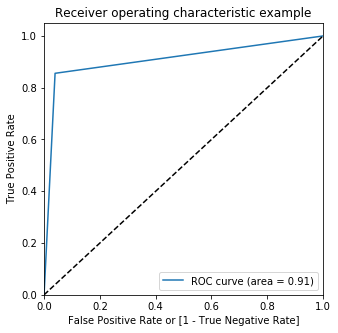

In [163]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


In [164]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [165]:
X_train.head()


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Pay per Click Ads,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_bing,Lead Source_welearnblog_Home,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,...,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,..

In [166]:
X_test = X_test[col]
X_test.head()


,Lead Source_Welingak Website,Lead Source_Welingak Website,Tags_Busy,Tags_Busy,Tags_Closed by Horizzon,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Lost to EINS,Tags_Will revert after reading the email,Tags_Will revert after reading the email,Tags_switched off,Tags_switched off,Last Notable Activity_SMS Sent,Last Notable Activity_SMS Sent,Lead Source_Welingak Website,Lead Source_Welingak Website,Tags_Busy,Tags_Busy,Tags_Closed by Horizzon,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Lost to EINS,Tags_Ringing,Tags_Ringing,Tags_Will revert after reading the email,Tags_Will revert after reading the email,Lead Quality_Not Sure,Lead Quality_Not Sure,Lead Quality_Worst,Lead Quality_Worst
3271,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0
1490,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
7936,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0
4216,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
3830,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0


In [167]:
y_test_pred = classifier.predict(X_test)


In [168]:
y_test_pred[:10]


array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0], dtype=int64)

In [169]:
print(metrics.accuracy_score(y_test, y_test_pred))


0.9140653690782226


In [170]:
# #### Using K-NearestNeighbour classification

from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors=5,weights='uniform',metric='minkowski')
classifier1.fit(X_train_sm,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [171]:

y_test_pred1 = classifier1.predict(X_test)

print(metrics.accuracy_score(y_test, y_test_pred1))


0.9144326110907087


In [172]:
# #### Using Support Vector Machine Classification
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'rbf',gamma='scale',C = 1.0, random_state = 0)
classifier2.fit(X_train_sm, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [173]:
y_test_pred2 = classifier2.predict(X_test)

print(metrics.accuracy_score(y_test, y_test_pred2))



0.914799853103195


In [174]:
# ### Using Random Forest Classification

from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators=150)
classifier3.fit(X_train_sm, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [175]:
y_test_pred3 = classifier3.predict(X_test)

print(metrics.accuracy_score(y_test, y_test_pred3))


0.9144326110907087
